# **1.0,	0.672018,	0.852494,	0.664661, 0.940423,	0.873472,	0.739187,	0.882477**
# **Average correlation coefficients 0.843727**

In [ ]:
import os
import pandas as pd
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_dir = '/content/gdrive/MyDrive/360 Rocks'

In [ ]:
image_files = [f for f in os.listdir(data_dir) if f.endswith(('.jpg', '.png'))]


In [ ]:
df = pd.DataFrame({'filename': image_files})
df['class'] = df['filename'].apply(lambda x: x[0])  # Extract class from the first character of the filename


In [ ]:
# train_df = df.sample(frac=0.8, random_state=42)
# validation_df = df.drop(train_df.index)

# Select 240 images for training
train_df = df.head(240)

# Select remaining 120 images for validation
validation_df = df.tail(120)

In [ ]:
img_width, img_height = 224, 224
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)


In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    data_dir,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    interpolation='nearest'
)

Found 240 validated image filenames belonging to 3 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    data_dir,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    interpolation='nearest'
)

Found 120 validated image filenames belonging to 3 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(8, activation='relu')(x)  # Customize the number of neurons in this layer
predictions = layers.Dense(3, activation='softmax')(x)  # Output layer with 3 neurons for 3 categories


In [ ]:
model = models.Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10  # Adjust the number of epochs as needed
)

Epoch 1/10
7/7 [==============================] - 18s 747ms/step - loss: 1.1462 - accuracy: 0.2545 - val_loss: 1.1236 - val_accuracy: 0.3333
Epoch 2/10
7/7 [==============================] - 7s 974ms/step - loss: 1.0775 - accuracy: 0.4375 - val_loss: 1.2455 - val_accuracy: 0.1146
Epoch 3/10
7/7 [==============================] - 5s 751ms/step - loss: 1.0668 - accuracy: 0.4279 - val_loss: 1.2912 - val_accuracy: 0.1146
Epoch 4/10
7/7 [==============================] - 5s 784ms/step - loss: 1.0568 - accuracy: 0.4663 - val_loss: 1.2628 - val_accuracy: 0.1458
Epoch 5/10
7/7 [==============================] - 7s 1s/step - loss: 1.0357 - accuracy: 0.4760 - val_loss: 1.1686 - val_accuracy: 0.1875
Epoch 6/10
7/7 [==============================] - 5s 813ms/step - loss: 1.0240 - accuracy: 0.5096 - val_loss: 1.1222 - val_accuracy: 0.2812
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 1.0178 - accuracy: 0.5337 - val_loss: 1.1402 - val_accuracy: 0.3021
Epoch 8/10
7/7 [=========

In [ ]:
import matplotlib.pyplot as plt

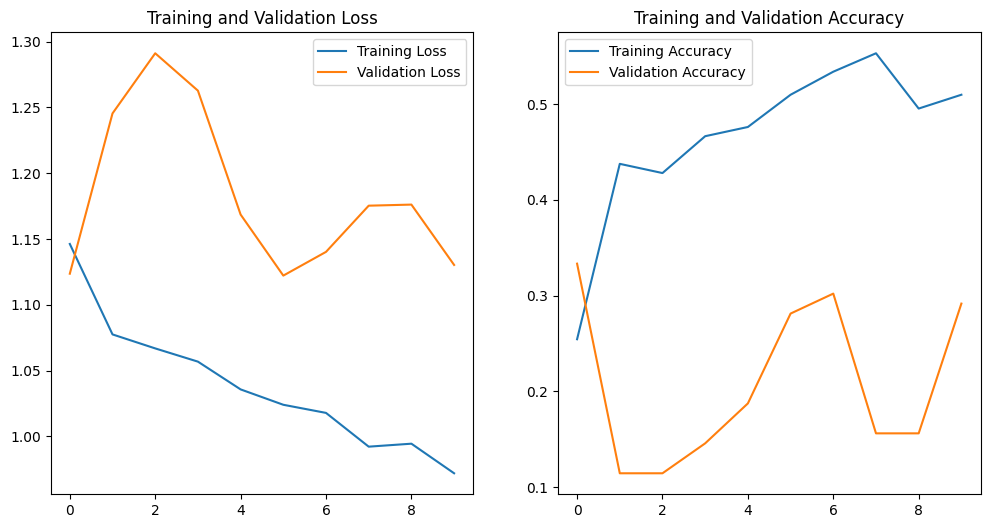

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

# Inception

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
img_width, img_height = 299, 299  # InceptionV3 input size
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)


In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    data_dir,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    interpolation='nearest'
)


Found 240 validated image filenames belonging to 3 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    data_dir,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    interpolation='nearest'
)

Found 120 validated image filenames belonging to 3 classes.


In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False


87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(8, activation='relu')(x)  # Customize the number of neurons in this layer
predictions = layers.Dense(3, activation='softmax')(x)  # Output layer with 3 neurons for 3 categories

model = models.Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10  # Adjust the number of epochs as needed
)

Epoch 1/10
7/7 [==============================] - 18s 1s/step - loss: 1.1694 - accuracy: 0.3510 - val_loss: 1.2781 - val_accuracy: 0.2500
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 1.0612 - accuracy: 0.4038 - val_loss: 1.5710 - val_accuracy: 0.1146
Epoch 3/10
7/7 [==============================] - 7s 1s/step - loss: 1.0096 - accuracy: 0.4808 - val_loss: 1.1714 - val_accuracy: 0.2500
Epoch 4/10
7/7 [==============================] - 10s 1s/step - loss: 0.9683 - accuracy: 0.5192 - val_loss: 1.2631 - val_accuracy: 0.3021
Epoch 5/10
7/7 [==============================] - 7s 1s/step - loss: 0.8862 - accuracy: 0.6058 - val_loss: 1.1935 - val_accuracy: 0.3021
Epoch 6/10
7/7 [==============================] - 11s 2s/step - loss: 0.8596 - accuracy: 0.5848 - val_loss: 1.1191 - val_accuracy: 0.3333
Epoch 7/10
7/7 [==============================] - 7s 1s/step - loss: 0.8770 - accuracy: 0.6010 - val_loss: 1.0716 - val_accuracy: 0.4479
Epoch 8/10
7/7 [======================

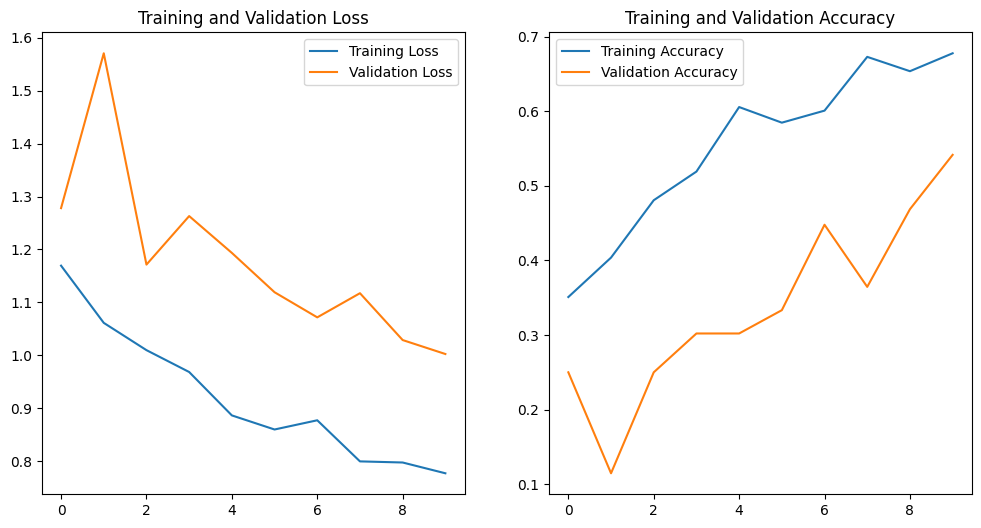

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

# Trying other models

In [ ]:
from tensorflow.keras.applications import (
    ResNet50,
    MobileNet,
    Xception,
    DenseNet121
)


In [ ]:
img_width, img_height = 224, 224
batch_size = 32
epochs = 10

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)


In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    data_dir,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    interpolation='nearest'
)

Found 240 validated image filenames belonging to 3 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    data_dir,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    interpolation='nearest'
)

Found 120 validated image filenames belonging to 3 classes.


In [ ]:
pretrained_models = [ResNet50, MobileNet, Xception, DenseNet121]


In [ ]:
accuracies = []

for model_class in pretrained_models:
    # Load the pre-trained model without the top (fully connected) layers
    base_model = model_class(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

    # Freeze the convolutional layers
    for layer in base_model.layers:
        layer.trainable = False

    # Create a custom model with a new output layer
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(8, activation='relu')(x)  # Customize the number of neurons in this layer
    predictions = layers.Dense(3, activation='softmax')(x)  # Output layer with 3 neurons for 3 categories

    model = models.Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        epochs=epochs
    )

    # Print the final validation accuracy
    final_val_accuracy = history.history['val_accuracy'][-1]
    print(f'{model_class.__name__} - Final Validation Accuracy: {final_val_accuracy}')

    accuracies.append((model_class.__name__, final_val_accuracy))

# Sort and print the accuracies
sorted_accuracies = sorted(accuracies, key=lambda x: x[1], reverse=True)
print("\nAccuracies:")
for model_name, accuracy in sorted_accuracies:
    print(f"{model_name}: {accuracy}")

94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
7/7 [==============================] - 13s 814ms/step - loss: 1.2064 - accuracy: 0.3990 - val_loss: 1.1307 - val_accuracy: 0.1146
Epoch 2/10
7/7 [==============================] - 6s 824ms/step - loss: 1.0968 - accuracy: 0.3702 - val_loss: 1.4172 - val_accuracy: 0.1146
Epoch 3/10
7/7 [==============================] - 7s 995ms/step - loss: 1.0896 - accuracy: 0.4231 - val_loss: 1.3871 - val_accuracy: 0.1146
Epoch 4/10
7/7 [==============================] - 5s 718ms/step - loss: 1.0684 - accuracy: 0.4183 - val_loss: 1.2550 - val_accuracy: 0.1146
Epoch 5/10
7/7 [==============================] - 7s 1s/step - loss: 1.0772 - accuracy: 0.4279 - val_loss: 1.2804 - val_accuracy: 0.1146
Epoch 6/10
7/7 [==============================] - 5s 768ms/step - loss: 1.0610 - accuracy: 0.4375 - val_loss: 1.4058 - val_accuracy: 0.1146
Epoch 7/10
7/7 [==============================] - 6s 901ms/step - loss: 1.0702 - accuracy: 0.3894

# Transformers

In [ ]:
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.4 MB/s eta 0:00:00


In [ ]:
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import tensorflow_addons as tfa

try:
    from tensorflow_addons.layers import vit
    print("Vision Transformer (ViT) module found in TensorFlow Addons.")
except ImportError:
    print("Vision Transformer (ViT) module not found in TensorFlow Addons.")


Vision Transformer (ViT) module not found in TensorFlow Addons.


In [ ]:
import tensorflow_hub as hub

In [ ]:
img_width, img_height = 224, 224
batch_size = 32
epochs = 10

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)


In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    data_dir,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    interpolation='nearest'
)


Found 240 validated image filenames belonging to 3 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    data_dir,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    interpolation='nearest'
)


Found 120 validated image filenames belonging to 3 classes.


In [ ]:
vit_url = "https://tfhub.dev/sayakpaul/vit_s16_classification/1"
base_model = hub.KerasLayer(vit_url, trainable=False)


In [ ]:
model = models.Sequential([
    base_model,
    layers.Reshape((-1, 1000)),  # Reshape the output to match GlobalAveragePooling2D input shape
    layers.GlobalAveragePooling1D(),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/10
7/7 [==============================] - 28s 2s/step - loss: 1.1563 - accuracy: 0.4423 - val_loss: 1.0687 - val_accuracy: 0.4792
Epoch 2/10
7/7 [==============================] - 5s 757ms/step - loss: 1.0077 - accuracy: 0.5144 - val_loss: 1.0665 - val_accuracy: 0.5208
Epoch 3/10
7/7 [==============================] - 7s 1s/step - loss: 0.8454 - accuracy: 0.5769 - val_loss: 0.7647 - val_accuracy: 0.6458
Epoch 4/10
7/7 [==============================] - 5s 706ms/step - loss: 0.8965 - accuracy: 0.5769 - val_loss: 0.8155 - val_accuracy: 0.6562
Epoch 5/10
7/7 [==============================] - 6s 890ms/step - loss: 0.7843 - accuracy: 0.6827 - val_loss: 0.7426 - val_accuracy: 0.6667
Epoch 6/10
7/7 [==============================] - 8s 1s/step - loss: 0.7935 - accuracy: 0.6202 - val_loss: 0.8006 - val_accuracy: 0.6562
Epoch 7/10
7/7 [==============================] - 6s 896ms/step - loss: 0.8248 - accuracy: 0.5817 - val_loss: 0.6716 - val_accuracy: 0.7083
Epoch 8/10
7/7 [============

In [ ]:
final_val_accuracy = history.history['val_accuracy'][-1]
print(f'Vision Transformer (ViT) - Final Validation Accuracy: {final_val_accuracy}')

Vision Transformer (ViT) - Final Validation Accuracy: 0.6458333134651184


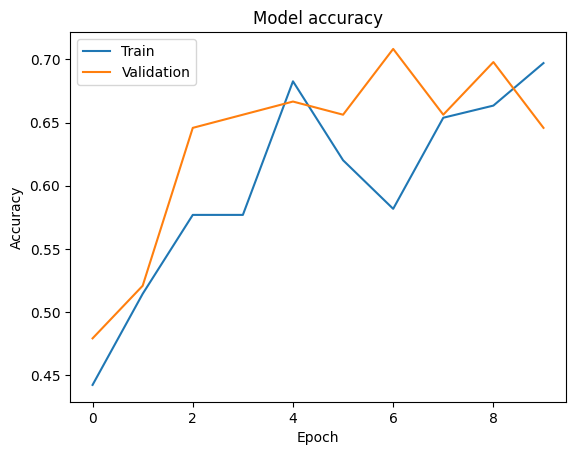

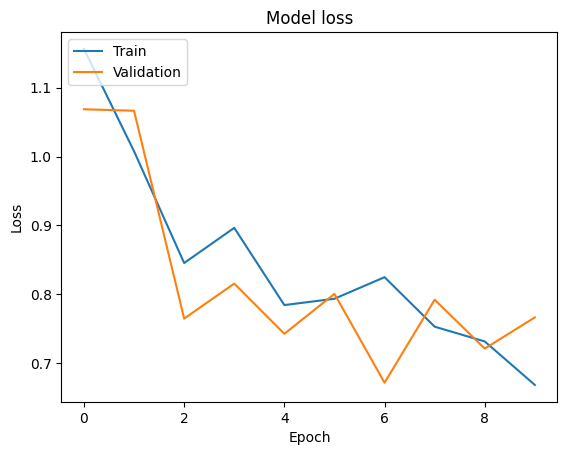

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    # Load the Vision Transformer (ViT) model from TensorFlow Hub
    vit_url = "https://tfhub.dev/sayakpaul/vit_s16_classification/1"  # Example URL, replace with your desired ViT model URL
    base_model = hub.KerasLayer(vit_url, trainable=False)

    # Create a custom model with a new output layer
    model = tf.keras.Sequential([
        base_model,
        layers.Reshape((-1, 1000)),
        layers.GlobalAveragePooling1D(),
        layers.BatchNormalization(),
        layers.Dense(hp.Int('dense_units', min_value=128, max_value=256, step=4), activation='relu'),
        layers.Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)),
        layers.BatchNormalization(),
        layers.Dense(hp.Int('dense_units', min_value=64, max_value=128, step=4), activation='relu'),
        layers.Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)),
        layers.BatchNormalization(),
        layers.Dense(hp.Int('dense_units', min_value=32, max_value=64, step=4), activation='relu'),
        layers.Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)),
        layers.BatchNormalization(),
        layers.Dense(8, activation='relu'),
        layers.Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)),
        layers.BatchNormalization(),
        layers.Dense(3, activation='softmax')
    ])

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Instantiate the tuner
tuner2 = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Adjust as needed
    executions_per_trial=1,
    directory='my_tuning_directory_2',  # Specify a directory to save tuning results
    project_name='vision_transformer_tuning1.2'
)


<ipython-input-51-00b2f5a04ea2>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
tuner2.search(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

Trial 10 Complete [00h 01m 37s]
val_accuracy: 0.4166666567325592

Best val_accuracy So Far: 0.6770833134651184
Total elapsed time: 00h 15m 32s


In [ ]:
best_hp = tuner2.get_best_hyperparameters()[0]

In [ ]:
best_hp

In [ ]:
# Build the final model with the best hyperparameters
final_model = tuner2.hypermodel.build(best_hp)

# Train the final model
final_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10
7/7 [==============================] - 30s 1s/step - loss: 1.3152 - accuracy: 0.3798 - val_loss: 2.1749 - val_accuracy: 0.4062
Epoch 2/10
7/7 [==============================] - 5s 738ms/step - loss: 1.0552 - accuracy: 0.5000 - val_loss: 2.0516 - val_accuracy: 0.3854
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.9505 - accuracy: 0.5385 - val_loss: 2.2940 - val_accuracy: 0.3542
Epoch 4/10
7/7 [==============================] - 5s 695ms/step - loss: 0.8020 - accuracy: 0.6538 - val_loss: 2.0971 - val_accuracy: 0.4062
Epoch 5/10
7/7 [==============================] - 5s 842ms/step - loss: 0.8232 - accuracy: 0.6346 - val_loss: 1.6956 - val_accuracy: 0.5208
Epoch 6/10
7/7 [==============================] - 5s 687ms/step - loss: 0.8169 - accuracy: 0.6442 - val_loss: 1.4398 - val_accuracy: 0.5938
Epoch 7/10
7/7 [==============================] - 7s 984ms/step - loss: 0.7476 - accuracy: 0.6635 - val_loss: 1.2695 - val_accuracy: 0.6042
Epoch 8/10
7/7 [=========

In [ ]:

# class CustomLayer(keras.layers.Layer):
#     def __init__(self, factor):
#         super().__init__()
#         self.factor = factor

#     def call(self, x):
#         return x * self.factor

#     def get_config(self):
#         return {"factor": self.factor}


# @keras.saving.register_keras_serializable(package="my_package", name="custom_fn")
# def custom_fn(x):
#     return x**2

In [ ]:
final_model.save("65%.keras")

In [ ]:
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1000)              22050664  
                                                                 
 reshape_1 (Reshape)         (None, 1, 1000)           0         
                                                                 
 global_average_pooling1d_1  (None, 1000)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 batch_normalization_5 (Bat  (None, 1000)              4000      
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 168)               168168    
                                                                 
 dropout_4 (Dropout)         (None, 168)              

In [ ]:
# Now, we can simply load without worrying about our custom objects.
# reconstructed_model = keras.models.load_model("65%.keras")


In [ ]:
import keras

In [ ]:
# !pip install tensorflow-addons


In [ ]:
# from tensorflow.keras.models import load_model
# import tensorflow_addons as tfa

# # Load the saved model with custom_objects
# loaded_model = load_model('65%.keras')

In [ ]:
# #  TO load the model
# from tensorflow.keras.models import load_model

# # Load the saved model
# loaded_model = load_model('/content/gdrive/MyDrive/transformer_model.h5')

In [ ]:
!pip install scipy --upgrade


In [ ]:
import numpy as np
from scipy.spatial import procrustes
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model, Model

In [ ]:
human_data = np.loadtxt('/content/gdrive/MyDrive/mds_360.txt')

In [ ]:
model = final_model


In [ ]:
for i, layer in enumerate(model.layers):
    print(f"Layer Index: {i}, Layer Name: {layer.name}, Layer Type: {layer.__class__.__name__}")

Layer Index: 0, Layer Name: keras_layer_1, Layer Type: KerasLayer
Layer Index: 1, Layer Name: reshape_1, Layer Type: Reshape
Layer Index: 2, Layer Name: global_average_pooling1d_1, Layer Type: GlobalAveragePooling1D
Layer Index: 3, Layer Name: batch_normalization_5, Layer Type: BatchNormalization
Layer Index: 4, Layer Name: dense_5, Layer Type: Dense
Layer Index: 5, Layer Name: dropout_4, Layer Type: Dropout
Layer Index: 6, Layer Name: batch_normalization_6, Layer Type: BatchNormalization
Layer Index: 7, Layer Name: dense_6, Layer Type: Dense
Layer Index: 8, Layer Name: dropout_5, Layer Type: Dropout
Layer Index: 9, Layer Name: batch_normalization_7, Layer Type: BatchNormalization
Layer Index: 10, Layer Name: dense_7, Layer Type: Dense
Layer Index: 11, Layer Name: dropout_6, Layer Type: Dropout
Layer Index: 12, Layer Name: batch_normalization_8, Layer Type: BatchNormalization
Layer Index: 13, Layer Name: dense_8, Layer Type: Dense
Layer Index: 14, Layer Name: dropout_7, Layer Type: Dro

In [ ]:
activation_model = Model(inputs=model.input, outputs=model.get_layer('dense_8').output)
network_data = activation_model.predict(validation_generator)


4/4 [==============================] - 6s 2s/step


In [ ]:
network_data.shape

(120, 8)

In [ ]:
hd = human_data[240:360]

In [ ]:
hd.shape

(120, 8)

In [ ]:
mtx1, mtx2, disparity = procrustes(hd,network_data)

In [ ]:
disparity

0.9492144798396105

In [ ]:
correlation_df = pd.DataFrame(columns=['Disparity','Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', 'Dimension 5', 'Dimension 6', 'Dimension 7', 'Dimension 8'])
# Function to calculate correlation for each dimension
def calculate_correlation(mtx1, mtx2,disparity):

    correlation = np.corrcoef(mtx1, mtx2)

    return disparity,correlation

In [ ]:
disparity,dimensions = calculate_correlation(hd,mtx1,disparity)

In [ ]:
dimensions.shape

(240, 240)

In [ ]:
correlation_df.loc[len(correlation_df.index)] = [disparity,dimensions[0,0],dimensions[0,1],dimensions[0,2],dimensions[0,3],dimensions[0,4],dimensions[0,5],dimensions[0,6],dimensions[0,7]]


In [ ]:
correlation_df

,Disparity,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8
0,0.949214,1.0,0.672018,0.852494,0.664661,0.940423,0.873472,0.739187,0.882477


In [ ]:
average_val = correlation_df.mean(axis=1)
average_val

0    0.84155
dtype: float64

In [ ]:
activation_model = Model(inputs=model.input, outputs=model.get_layer('dense_8').output)
network_data = activation_model.predict(validation_generator)


4/4 [==============================] - 2s 286ms/step


In [ ]:
test_dir = '/content/gdrive/MyDrive/120 Rocks'

In [ ]:
image_files = [f for f in os.listdir(test_dir) if f.endswith(('.jpg', '.png'))]

In [ ]:
df = pd.DataFrame({'filename': image_files})
df['class'] = df['filename'].apply(lambda x: x[0])  # Extract class from the first character of the filename


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

In [ ]:
test_gen = test_datagen.flow_from_dataframe(
    df,
    test_dir,
    x_col='filename',
    y_col='class',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    interpolation='nearest'
)


Found 120 validated image filenames belonging to 3 classes.


In [ ]:
human_data = np.loadtxt('/content/gdrive/MyDrive/mds_120.txt')

In [ ]:
human_data[0]

array([-0.72, -0.61, -0.19, -0.94, -1.62, -2.11,  2.58, -1.78])

In [ ]:
mtx1, mtx2, disparity = procrustes( network_data, human_data)

In [ ]:
correlation_df = pd.DataFrame(columns=['Disparity','Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', 'Dimension 5', 'Dimension 6', 'Dimension 7', 'Dimension 8'])
# Function to calculate correlation for each dimension
def calculate_correlation(mtx1, mtx2,disparity):

    correlation = np.corrcoef(mtx1, mtx2)

    return disparity,correlation

In [ ]:
disparity,dimensions = calculate_correlation(hd,mtx1,disparity)

In [ ]:
correlation_df.loc[len(correlation_df.index)] = [disparity,dimensions[0,0],dimensions[0,1],dimensions[0,2],dimensions[0,3],dimensions[0,4],dimensions[0,5],dimensions[0,6],dimensions[0,7]]


In [ ]:
correlation_df

,Disparity,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8
0,0.968813,1.0,0.672018,0.852494,0.664661,0.940423,0.873472,0.739187,0.882477


In [ ]:
average_test = correlation_df.mean(axis=1)
average_test

0    0.843727
dtype: float64